# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')


# Loading my dataset

In [4]:
# Loading dataset
NHANES_DF = pd.read_csv('NHANES.csv')

NHANES_DF.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


# Checking for number of columns and rows

In [5]:
# Checking for number of columns and rows
NHANES_DF.shape

(2278, 10)

# Exploring my dataset

In [6]:
#summary of dataset

NHANES_DF.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [7]:
NHANES_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [8]:
NHANES_DF['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

# Convert the categorical features to interger codes

In [9]:

NHANES_DF['age_group'].replace(['Adult', 'Senior'],[0,1],inplace=True)
NHANES_DF

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


# Checking for missing values

In [10]:
# Checking for missing values
NHANES_DF.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

# Exploratory Data Analysis.

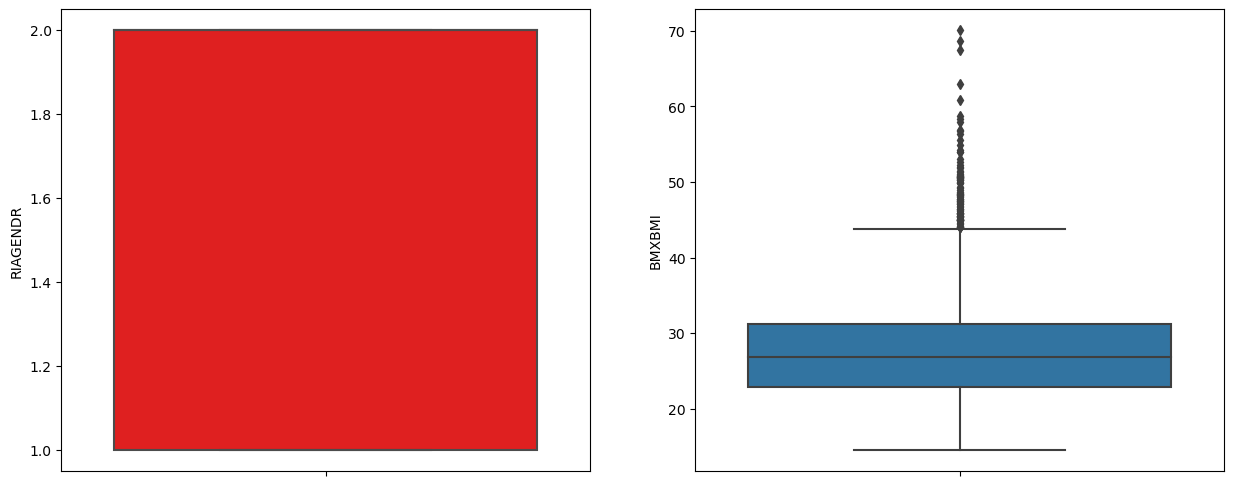

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=NHANES_DF["RIAGENDR"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=NHANES_DF["BMXBMI"])
plt.show()

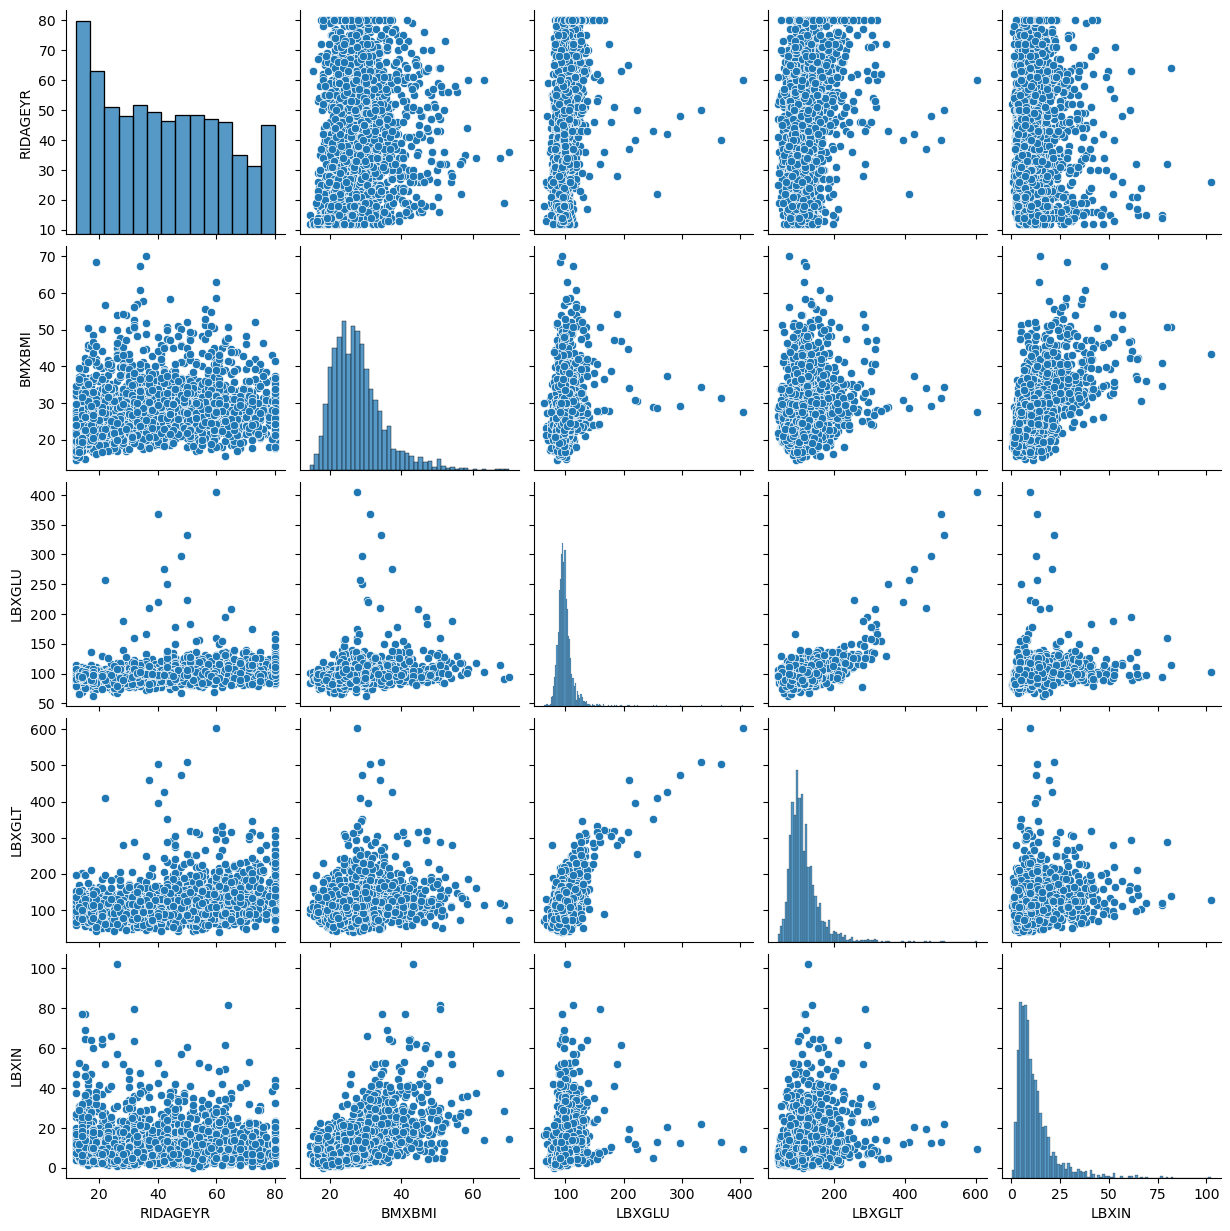

In [11]:
# Exploring numerical variables using pairplot.
sns.pairplot(NHANES_DF.iloc[:,[2,5,6,8,9]])

# Feature Selection

In [12]:
# Selecting relevant features for clustering
X = NHANES_DF[['RIDAGEYR', 'BMXBMI']]

# Standardizing my data

In [13]:
# Standardizing process
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

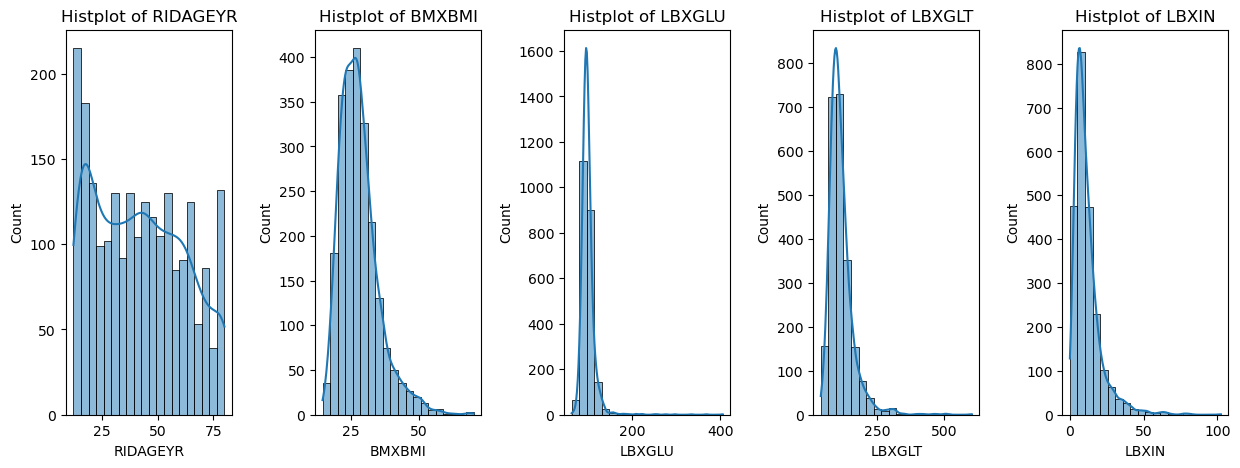

In [18]:
# Visualizing numerical variables using histograms
numerical_variables = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

plt.figure(figsize=(15, 5))
for n, i in enumerate(numerical_variables, 1):
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(NHANES_DF[i], bins=20, kde=True)
    plt.title("Histplot of {}".format(i))
plt.show()

# K-Means clustering

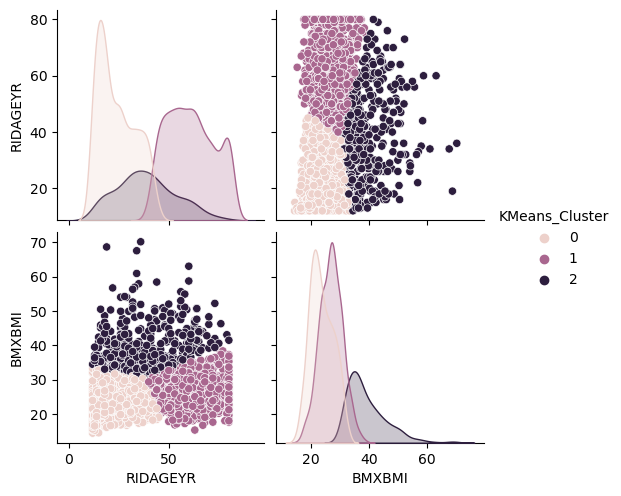

In [14]:
# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=3)
NHANES_DF['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
sns.pairplot(NHANES_DF, hue='KMeans_Cluster', vars=X.columns)
plt.show()

# Hierarchical Clustering

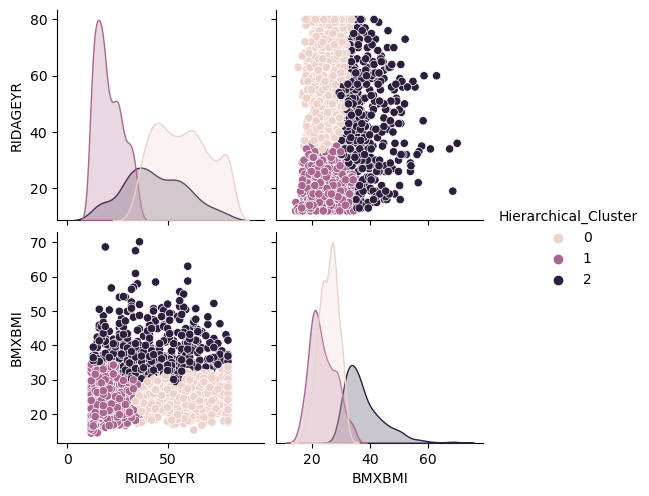

In [15]:
# Apply Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
NHANES_DF['Hierarchical_Cluster'] = agglomerative.fit_predict(X_scaled)

# Visualize the clusters
sns.pairplot(NHANES_DF, hue='Hierarchical_Cluster', vars=X.columns)
plt.show()

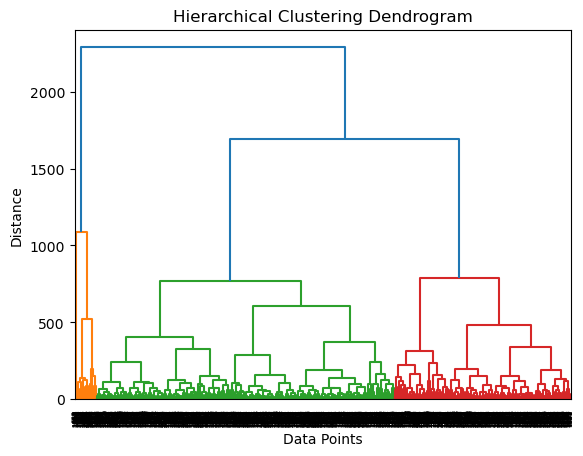

In [16]:
# Perform hierarchical clustering and obtain the linkage matrix





# Import necessary libraries
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering


# Perform hierarchical clustering and obtain the linkage matrix
linkage_matrix = linkage(NHANES_DF.iloc[:, 1:], method='ward')

# Create a dendrogram from the linkage matrix
dendrogram(linkage_matrix, orientation="top")

# Display the dendrogram
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
